# Ramen Noodles

The purpose of this project is to give an exploratory analysis on Ramen Noodles. The source of the data set is from https://www.theramenrater.com/resources-2/the-list/, which is a blogging website that reviews ramen noodles. The project will mainly consist of observing the data set and providing solutions & graphs of possible questions that may arise from analyzing the data set.

Q1. What are the Top 10 Manufacturers of Noodles?

Q2. What are the Top 5 Products from each Brand?

Q3. What is the Average Rating of each Brand?

Q4. What is the Average Rating for each Style of Noodle?

Q5. Which Product Style is Popular among each Brand?

Q6. Which Style of Noodles is Popular among Countries for each Brand?

Final Observation


In [1]:
# Import Python Libraries
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
# Import Ramen Data Set from ramen.csv & display the top 10 data inside 
#the csv to ensure that it is successful

ramen_data = pandas.read_csv('ramen.csv')
ramen_data.head(10)

,Review #,Brand,Variety,Style,Country,Stars
0,3400,EDO Pack,Kumamoto Flavour Noodles,Cup,Hong Kong,1
1,3399,Pan Mee,Goreng Dried Chili Shrimp Flavour,Pack,Malaysia,5
2,3398,Paldo,King Lid Ramen Noodle Soup,Pack,South Korea,5
3,3397,Nissin Miojo,Cremoso Carno Com Chili,Pack,Brazil,2
4,3396,Samyang Foods,Cham Ramen Big Bowl,Bowl,South Korea,2.25
5,3395,Maruchan,Akai Kitsune Yakiudon,Tray,Japan,2
6,3394,Nissin,Top Ramen Soy Sauce Bowl,Bowl,United States,3
7,3393,Nissin,Anpanman Soy Sauce Flavor Cup Noodle,Cup,Japan,3.5
8,3392,Wu Mu,Mandashi Mala Spicy Noodle,Box,Taiwan,5
9,3391,Marutai,Boh Ramen Shoyu Aji,Pack,Japan,5


In [3]:
# To clean the dataset by filtering our ratings that contain strings or irregular values & converts
#all values in the Stars column into floating

ramen_data = ramen_data[ramen_data['Stars']!='Unrated']  
ramen_data = ramen_data[ramen_data['Stars']!='NR']
ramen_data['Stars'] = ramen_data['Stars'].apply(lambda x:x.split('/')[0])
ramen_data['Stars'] = pandas.to_numeric(ramen_data['Stars'])

In [4]:
# Tallys up the number of brands and sorts by ascending order and displaying the top 10 brands

ramBrandTopTen = ramen_data['Brand'].value_counts().head(10)
ramBrandTopTen

Nissin             460
Maruchan           120
Nongshim           113
Myojo               96
Samyang Foods       92
Paldo               76
Mama                71
Indomie             56
Sapporo Ichiban     54
Ottogi              47
Name: Brand, dtype: int64

# Q1. What are the Top 10 Manufacturers of Noodles?

According to the bar graph, the manufacturer that produces the most products, and by a large margin compared to their competitors, is Nissin. Meanwhile other manufacturers have a closer margin of products between each other with an average of 118.5 products per manufacturer.

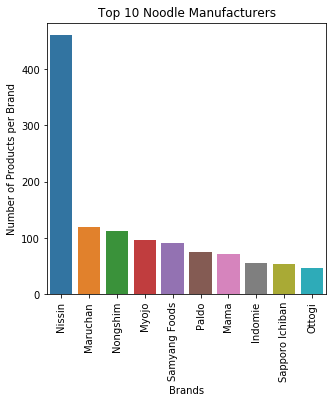

In [5]:
#Display a barplot of the Top 10 Noodle Manufacturers

fig, ax = plt.subplots(figsize=(5,5))
seaborn.barplot(ramBrandTopTen.index, ramBrandTopTen)
ax.set(xlabel = 'Brands', ylabel = 'Number of Products per Brand')
plt.title('Top 10 Noodle Manufacturers')
plt.xticks(rotation = 'vertical')
plt.show()

In [6]:
print('Mean: ',ramBrandTopTen.mean())
print('ST.D: ',ramBrandTopTen.std())

Mean:  118.5
ST.D:  122.52188013212624


# Q2. What is the Top 5 Products from each Brand?

In [7]:
#Top 5 Nissin Noodles from Nissin
nissinBrand = ramen_data[ramen_data['Brand'] == 'Nissin']
nissinBrand.sort_values(by = ['Stars'], ascending=False).head()

,Review #,Brand,Variety,Style,Country,Stars
1340,2060,Nissin,Cup Noodle Light+ Cheese Fondue,Cup,Japan,5.0
1410,1990,Nissin,Cup Noodle,Cup,Japan,5.0
862,2538,Nissin,Cup Noodles Very Veggie Beef Flavor Ramen Nood...,Cup,United States,5.0
1316,2084,Nissin,Demae Ramen Straight Noodle Kyushu Tonkotsu In...,Pack,Hong Kong,5.0
859,2541,Nissin,Cup Noodles Very Veggie Spicy Chicken Flavor R...,Cup,United States,5.0


In [8]:
#Top 5 Maruchan Noodles from Marucchan
maruchanBrand = ramen_data[ramen_data['Brand'] == 'Maruchan']
maruchanBrand.sort_values(by = ['Stars'], ascending=False).head()

,Review #,Brand,Variety,Style,Country,Stars
1328,2072,Maruchan,Bowl Taste Of Asia Beef Flavor Sukiyaki Ramen,Bowl,United States,5.0
724,2676,Maruchan,Bowl Taste Of Asia Tom Yum Ramen Noodle Soup,Bowl,United States,5.0
469,2931,Maruchan,Ramen Noodle Soup Creamy Chicken Flavor (New P...,Pack,United States,5.0
551,2849,Maruchan,Japanese Soba,Bowl,Japan,5.0
593,2807,Maruchan,Gotsumori Shio Wonton Ramen,Bowl,Japan,5.0


In [9]:
#Top 5 Nongshim Noodles
nongshimBrand = ramen_data[ramen_data['Brand'] == 'Nongshim']
nongshimBrand.sort_values(by = ['Stars'], ascending = False).head()

,Review #,Brand,Variety,Style,Country,Stars
63,3337,Nongshim,Fururu Cold Noodles,Pack,Japan,5.0
1573,1827,Nongshim,Zha Wang ((Jjawang) Noodles With Chajang Sauce,Pack,South Korea,5.0
1576,1824,Nongshim,Soon Veggie Noodle Soup,Cup,United States,5.0
1336,2064,Nongshim,Arrabiata Rice Bucatini,Pack,United States,5.0
1306,2094,Nongshim,Champong Noodle Soup Spicy Seafood Flavor,Pack,South Korea,5.0


In [10]:
#Top 5 Myojo Noodles
myojoBrand = ramen_data[ramen_data['Brand'] == 'Myojo']
myojoBrand.sort_values(by = ['Stars'], ascending = False).head()

,Review #,Brand,Variety,Style,Country,Stars
656,2744,Myojo,Charumera Non-Fried Tonkotsu Ramen,Pack,Japan,5.0
378,3022,Myojo,Yakisoba Curry Flavor,Pack,United States,5.0
1542,1858,Myojo,Wantan Men,Bowl,Japan,5.0
599,2801,Myojo,Ippei-chan Yomise-no Yakisoba Barbeque Sauce F...,Tray,Japan,5.0
1522,1878,Myojo,Extra Spicy Singapore Curry Big Bowl,Bowl,Singapore,5.0


In [11]:
#Top 5 Samyang Noodles
samyangBrand = ramen_data[ramen_data['Brand'] == 'Samyang Foods']
samyangBrand.sort_values(by = ['Stars'], ascending = False).head()

,Review #,Brand,Variety,Style,Country,Stars
1426,1974,Samyang Foods,Cheese Curry Ramyun,Pack,South Korea,5.0
2100,1300,Samyang Foods,Red Nagasaki Jjampong,Pack,South Korea,5.0
850,2550,Samyang Foods,Paegaejang Ramen,Pack,South Korea,5.0
61,3339,Samyang Foods,Jjajang Buldak Ramen Topokki,Pack,South Korea,5.0
2371,1029,Samyang Foods,Nagasaki Crab Jjampong,Pack,South Korea,5.0


In [12]:
#Top 5 Paldo Noodles
paldoBrand = ramen_data[ramen_data['Brand'] == 'Paldo']
paldoBrand.sort_values(by = ['Stars'], ascending = False).head()

,Review #,Brand,Variety,Style,Country,Stars
2,3398,Paldo,King Lid Ramen Noodle Soup,Pack,South Korea,5.0
1180,2220,Paldo,Budae Jjigae,Pack,South Korea,5.0
2726,674,Paldo,Kko Kko Myun,Pack,South Korea,5.0
2577,823,Paldo,Kokomen Spicy Chicken,Pack,South Korea,5.0
2576,824,Paldo,Bibim Men Cucumber,Pack,South Korea,5.0


In [13]:
#Top 5 Mama Noodles
mamaBrand = ramen_data[ramen_data['Brand'] == 'Mama']
mamaBrand.sort_values(by = ['Stars'], ascending = False).head()

,Review #,Brand,Variety,Style,Country,Stars
2098,1302,Mama,Instant Noodles Yentafo Tom Yum Mohfai Flavour,Pack,Thailand,5.0
1669,1731,Mama,Instant Noodles Creamy Shrimp Tom Yum Flavour,Pack,Cambodia,5.0
1775,1625,Mama,Instant Rice Noodle Soup Spicy Shrimp Flavour,Bowl,Thailand,5.0
1927,1473,Mama,Instant Cup Noodles Shrimp Tom Yum Flavour (Ex...,Cup,Thailand,5.0
1738,1662,Mama,Non-Fried Instant Noodles Ramen Tonkotsu Flavor,Pack,Thailand,5.0


In [14]:
#Top 5 Indomie Noodles
indomieBrand = ramen_data[ramen_data['Brand'] == 'Indomie']
indomieBrand.sort_values(by = ['Stars'], ascending = False).head()

,Review #,Brand,Variety,Style,Country,Stars
392,3008,Indomie,Real Meat Mi Instan Goreng Rendang,Box,Indonesia,5.0
2537,863,Indomie,Special Fried Curly Noodle (Local),Pack,Indonesia,5.0
3355,45,Indomie,Mi Goreng Sate,Pack,Indonesia,5.0
3353,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5.0
3350,50,Indomie,Mi Goreng,Pack,Indonesia,5.0


In [15]:
#Top 5 Sapporo Noodles
sapporoBrand = ramen_data[ramen_data['Brand'] == 'Sapporo Ichiban']
sapporoBrand.sort_values(by = ['Stars'], ascending = False).head()

,Review #,Brand,Variety,Style,Country,Stars
2162,1238,Sapporo Ichiban,Sesame Ramen,Pack,Japan,5.0
3387,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5.0
1525,1875,Sapporo Ichiban,Tonkotsu Ramen Artificially Flavored Tonkotsu ...,Pack,United States,5.0
1851,1549,Sapporo Ichiban,Chow Mein Japanese Style Noodles Yakisoba,Pack,Canada,5.0
2748,652,Sapporo Ichiban,Shio,Pack,Japan,5.0


In [16]:
#Top 5 Ottogi Noodles
ottogiBrand = ramen_data[ramen_data['Brand'] == 'Ottogi']
ottogiBrand.sort_values(by = ['Stars'], ascending = False).head()


,Review #,Brand,Variety,Style,Country,Stars
756,2644,Ottogi,Budae Jjigae Ramen,Pack,South Korea,5.00
1009,2391,Ottogi,Jin Jjambbong Spicy Seafood Ramyun,Pack,South Korea,5.00
2425,975,Ottogi,Spaghetti Ramen,Bowl,South Korea,4.50
2864,536,Ottogi,Yeul Ramyun,Pack,South Korea,4.25
926,2474,Ottogi,Ppushu Ppushu Noodle Snack Chilli Cheese Flavor,Pack,South Korea,4.25


# Q3.  What is the Average Rating of each Brand?

The subplot of each Brand Rating Distribution fall between 3.5 to 4.0 stars. However, in some of the brands such as Ottogi there is a large spike in the graph which may be attributed to some form of bias or lack of data.

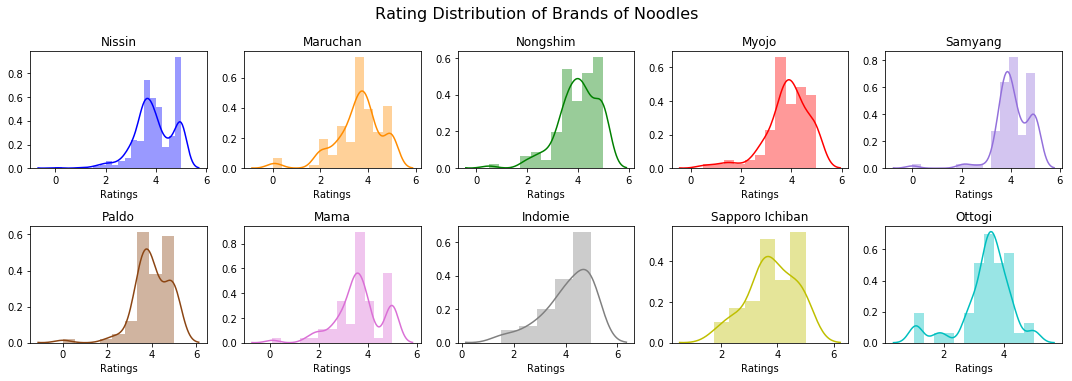

In [17]:
#Display 2 x 5 plots of rating distribution for each brand noodles
fig,ax =plt.subplots(2,5,figsize=(15,5))

plt.suptitle('Rating Distribution of Brands of Noodles', y=1.05, size=16)
plt.sca(ax[0][0])
seaborn.distplot(nissinBrand['Stars'], color = 'b')
plt.xlabel('Ratings')
plt.title('Nissin')

plt.sca(ax[0][1])
seaborn.distplot(maruchanBrand['Stars'], color = 'darkorange')
plt.xlabel('Ratings')
plt.title('Maruchan')

plt.sca(ax[0][2])
seaborn.distplot(nongshimBrand['Stars'], color = 'g')
plt.xlabel('Ratings')
plt.title('Nongshim')

plt.sca(ax[0][3])
seaborn.distplot(myojoBrand['Stars'], color = 'r')
plt.xlabel('Ratings')
plt.title('Myojo')

plt.sca(ax[0][4])
seaborn.distplot(samyangBrand['Stars'], color = 'mediumpurple')
plt.xlabel('Ratings')
plt.title('Samyang')

plt.sca(ax[1][0])
seaborn.distplot(paldoBrand['Stars'], color = 'saddlebrown')
plt.xlabel('Ratings')
plt.title('Paldo')

plt.sca(ax[1][1])
seaborn.distplot(mamaBrand['Stars'], color = 'orchid')
plt.xlabel('Ratings')
plt.title('Mama')

plt.sca(ax[1][2])
seaborn.distplot(indomieBrand['Stars'], color = 'grey')
plt.xlabel('Ratings')
plt.title('Indomie')

plt.sca(ax[1][3])
seaborn.distplot(sapporoBrand['Stars'], color = 'y')
plt.xlabel('Ratings')
plt.title('Sapporo Ichiban')

plt.sca(ax[1][4])
seaborn.distplot(ottogiBrand['Stars'], color = 'c')
plt.xlabel('Ratings')
plt.title('Ottogi')

plt.tight_layout()

In [18]:
# Print out the mean & standard deviation of each brand
print('Nissin')
print('Mean: ', nissinBrand['Stars'].mean())
print('ST.D: ', nissinBrand['Stars'].std())
print(' ')
print('Maruchan')
print('Mean: ', maruchanBrand['Stars'].mean())
print('ST.D: ', maruchanBrand['Stars'].std())
print(' ')
print('Nongshim')
print('Mean: ', maruchanBrand['Stars'].mean())
print('ST.D: ', maruchanBrand['Stars'].std())
print(' ')
print('Myojo')
print('Mean: ', myojoBrand['Stars'].mean())
print('ST.D: ', myojoBrand['Stars'].std())
print(' ')
print('Samyang')
print('Mean: ', samyangBrand['Stars'].mean())
print('ST.D: ', samyangBrand['Stars'].std())
print(' ')
print('Paldo')
print('Mean: ', paldoBrand['Stars'].mean())
print('ST.D: ', paldoBrand['Stars'].std())
print(' ')
print('Mama')
print('Mean: ', mamaBrand['Stars'].mean())
print('ST.D: ', mamaBrand['Stars'].std())
print(' ')
print('Indomie')
print('Mean: ', indomieBrand['Stars'].mean())
print('ST.D: ', indomieBrand['Stars'].std())
print(' ')
print('Sapporo Ichiban')
print('Mean: ', sapporoBrand['Stars'].mean())
print('ST.D: ', sapporoBrand['Stars'].std())
print(' ')
print('Ottogi')
print('Mean: ', ottogiBrand['Stars'].mean())
print('ST.D: ', ottogiBrand['Stars'].std())

Nissin
Mean:  3.9057065217391305
ST.D:  0.7986926209685531
 
Maruchan
Mean:  3.6010416666666667
ST.D:  1.0080161679695194
 
Nongshim
Mean:  3.6010416666666667
ST.D:  1.0080161679695194
 
Myojo
Mean:  3.8463541666666665
ST.D:  0.8836004333844532
 
Samyang
Mean:  4.095108695652174
ST.D:  0.7539660623796391
 
Paldo
Mean:  4.016447368421052
ST.D:  0.837740538905881
 
Mama
Mean:  3.6288732394366194
ST.D:  0.9803301911612295
 
Indomie
Mean:  4.089285714285714
ST.D:  0.9515878732515882
 
Sapporo Ichiban
Mean:  3.7824074074074074
ST.D:  0.8619940357565962
 
Ottogi
Mean:  3.4148936170212765
ST.D:  0.871275607422133


# Q4. What is the Average Rating for each Style of Noodle?

In order to determine the average rating of each style of noodle, we must verify the types of styles contained in the data. Since styles such as box, restaurant, can, and bar, does not contain sufficient data, we must omit them as they may skew the data. The main style of focus would be packs, bowls, cups, and trays. In the rating for the distribution of styles of noodles, the styles of noodles all follow a similar distribution. However, since tray has a fairly lower sample size compared to pack, bowl, and cups, the graph may not be as accurate, as it can be portrayed that Tray is not a fairly popular style of noodle.

In [19]:
#Check for the Number of Styles for each Noodles
ramen_data['Style'].unique()

array(['Cup', 'Pack', 'Bowl', 'Tray', 'Box', 'Restaurant', 'Can', 'Bar'],
      dtype=object)

In [20]:
ramen_data['Style'].value_counts()

Pack          1942
Bowl           655
Cup            593
Tray           151
Box             48
Restaurant       3
Bar              1
Can              1
Name: Style, dtype: int64

In [21]:
#Separate each Style of Ramen into their Respective Categories
cupStyle = ramen_data[ramen_data['Style'] == 'Cup']
packStyle = ramen_data[ramen_data['Style'] == 'Pack']
bowlStyle = ramen_data[ramen_data['Style'] == 'Bowl']
trayStyle = ramen_data[ramen_data['Style'] == 'Tray']

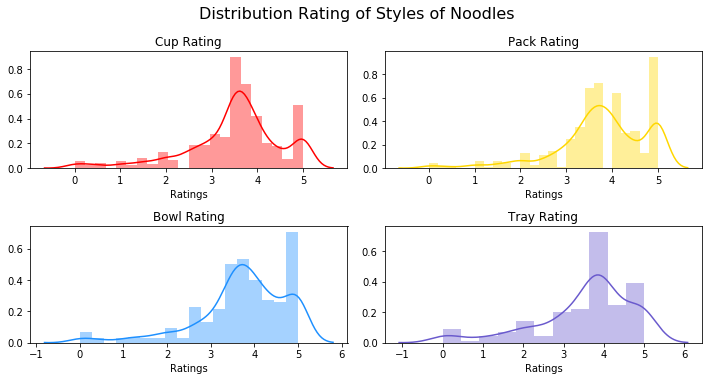

In [22]:
#Display 2 x 2 plots of rating distribution for each Style of noodles
fig,ax =plt.subplots(2,2, figsize = (10,5))
plt.suptitle('Distribution Rating of Styles of Noodles', y = 1.05, size = 16)

plt.sca(ax[0][0])
seaborn.distplot(cupStyle['Stars'], color = 'red')
plt.xlabel('Ratings')
plt.title('Cup Rating')

plt.sca(ax[0][1])
seaborn.distplot(packStyle['Stars'], color = 'gold')
plt.xlabel('Ratings')
plt.title('Pack Rating')

plt.sca(ax[1][0])
seaborn.distplot(bowlStyle['Stars'], color = 'dodgerblue')
plt.xlabel('Ratings')
plt.title('Bowl Rating')

plt.sca(ax[1][1])
seaborn.distplot(trayStyle['Stars'], color = 'slateblue')
plt.xlabel('Ratings')
plt.title('Tray Rating')

plt.tight_layout()

# Q5. Which Product Style is Popular among each Brand?

In the graph, the style that is the most popular among each brand is pack. Meanwhile tray is the least popular style among many brands and even some brands do not manufacture this style. Cup and bowl are also heavily emphasized between brands such as Nissin, Sapporo Ichiban, and Maruchan, as they produce more cups and bowls than packs.

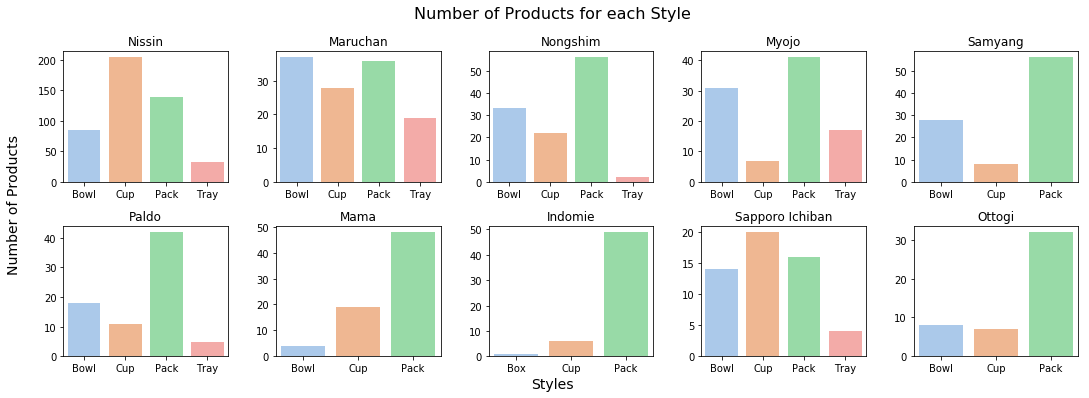

In [23]:
#Display 2 x 5 plots of distribution for each brand noodles
fig,ax = plt.subplots(2,5,figsize = (15,5))
fig.text(0.5, -0.01, 'Styles', ha = 'center', fontsize = 14)
fig.text(-0.005, .5, 'Number of Products', va = 'center', rotation = 'vertical', fontsize = 14)
plt.suptitle('Number of Products for each Style', y = 1.05, size = 16)


plt.sca(ax[0][0])
seaborn.barplot(x = nissinBrand['Style'].value_counts().sort_index().index, y = nissinBrand['Style'].value_counts().sort_index(), palette = 'pastel')
plt.ylabel(' ')
plt.title('Nissin')

plt.sca(ax[0][1])
seaborn.barplot(x = maruchanBrand['Style'].value_counts().sort_index().index, y = maruchanBrand['Style'].value_counts().sort_index(), palette = 'pastel')
plt.ylabel(' ')
plt.title('Maruchan')

plt.sca(ax[0][2])
seaborn.barplot(x = myojoBrand['Style'].value_counts().sort_index().index, y = nongshimBrand['Style'].value_counts().sort_index(), palette = 'pastel')
plt.ylabel(' ')
plt.title('Nongshim')

plt.sca(ax[0][3])
seaborn.barplot(x = myojoBrand['Style'].value_counts().sort_index().index, y = myojoBrand['Style'].value_counts().sort_index(), palette = 'pastel')
plt.ylabel(' ')
plt.title('Myojo')

plt.sca(ax[0][4])
seaborn.barplot(x = samyangBrand['Style'].value_counts().sort_index().index, y = samyangBrand['Style'].value_counts().sort_index(), palette = 'pastel')
plt.ylabel(' ')
plt.title('Samyang')

plt.sca(ax[1][0])
seaborn.barplot(x = paldoBrand['Style'].value_counts().sort_index().index, y = paldoBrand['Style'].value_counts().sort_index(), palette = 'pastel')
plt.ylabel(' ')
plt.title('Paldo')

plt.sca(ax[1][1])
seaborn.barplot(x = mamaBrand['Style'].value_counts().sort_index().index, y = mamaBrand['Style'].value_counts().sort_index(), palette = 'pastel')
plt.ylabel(' ')
plt.title('Mama')

plt.sca(ax[1][2])
seaborn.barplot(x = indomieBrand['Style'].value_counts().sort_index().index, y = indomieBrand['Style'].value_counts().sort_index(), palette = 'pastel')
plt.ylabel(' ')
plt.title('Indomie')

plt.sca(ax[1][3])
seaborn.barplot(x = sapporoBrand['Style'].value_counts().sort_index().index, y = sapporoBrand['Style'].value_counts().sort_index(), palette = 'pastel')
plt.ylabel(' ')
plt.title('Sapporo Ichiban')

plt.sca(ax[1][4])
seaborn.barplot(x = ottogiBrand['Style'].value_counts().sort_index().index, y = ottogiBrand['Style'].value_counts().sort_index(), palette = 'pastel')
plt.ylabel(' ')
plt.title('Ottogi')


plt.tight_layout()


# Q6. Which Style of Noodles is Popular among Countries for each Brand?

In Japan and U.S. there is a demand for all styles of noodles, while other countries such as South Korea, Singapore, Thailand, etc., put a heavy emphasis on pack noodles. Brands that export noodles to Japan, such as Nissin, Sapporo Ichiban, Maruchan, and Myojo, usually tailor their styles towards cup and bowl noodles. Meanwhile in the U.S. also has a high demand of cup and bowl noodles from Nissin and Nongshim. By comparing of each graph, it is observed that countries in Asia have a large import of packs of noodles from brands with the exception of Japan, which favours bowls and cups.

In [24]:
#Display the Countries which import each style of noodles for Nissin
nbc = nissinBrand.groupby(['Country','Style']).count()['Variety']
nbc.head()

Country   Style
Brazil    Cup      2
          Pack     5
China     Cup      3
Colombia  Cup      3
          Pack     3
Name: Variety, dtype: int64

In [25]:
#Display the Countries which import each style of noodles for Maruchan
mc = maruchanBrand.groupby(['Country','Style']).count()['Variety']
mc

Country        Style
Japan          Bowl     28
               Cup      11
               Pack     12
               Tray      4
Mexico         Pack      2
United States  Bowl      9
               Cup      17
               Pack     22
               Tray     15
Name: Variety, dtype: int64

In [26]:
#Display the Countries which import each style of noodles for Nongshim
nsc = nongshimBrand.groupby(['Country','Style']).count()['Variety']
nsc

Country        Style
China          Bowl      5
               Cup       1
               Pack      3
Japan          Cup       1
               Pack      1
South Korea    Bowl      8
               Cup      13
               Pack     38
               Tray      2
United States  Bowl     20
               Cup       7
               Pack     14
Name: Variety, dtype: int64

In [27]:
#Display the Countries which import each style of noodles for Myojo
mc = myojoBrand.groupby(['Country','Style']).count()['Variety']
mc

Country        Style
Japan          Bowl     22
               Cup       7
               Pack     23
               Tray     17
Singapore      Bowl      5
               Pack     14
United States  Bowl      4
               Pack      4
Name: Variety, dtype: int64

In [28]:
#Display the Countries which import each style of noodles for Samyang
syc = samyangBrand.groupby(['Country','Style']).count()['Variety']
syc

Country      Style
Japan        Cup       2
South Korea  Bowl     28
             Cup       6
             Pack     56
Name: Variety, dtype: int64

In [29]:
#Display the Countries which import each style of noodles for Mama
mac = mamaBrand.groupby(['Country','Style']).count()['Variety']
mac

Country     Style
Bangladesh  Pack      4
Cambodia    Pack      4
Myanmar     Cup       2
            Pack      3
Thailand    Bowl      4
            Cup      17
            Pack     37
Name: Variety, dtype: int64

In [30]:
#Display the Countries which import each style of noodles for Indomie
inc = indomieBrand.groupby(['Country','Style']).count()['Variety']
inc

Country    Style
Indonesia  Box       1
           Cup       6
           Pack     47
Nigeria    Pack      2
Name: Variety, dtype: int64

In [31]:
#Display the Countries which import each style of noodles for Sapporo Ichiban
sic = sapporoBrand.groupby(['Country','Style']).count()['Variety']
sic

Country        Style
Canada         Pack      1
Japan          Bowl     13
               Cup      16
               Pack      7
               Tray      4
United States  Bowl      1
               Cup       4
               Pack      8
Name: Variety, dtype: int64

In [32]:
#Display the Countries which import each style of noodles for Ottogi
oc = ottogiBrand.groupby(['Country','Style']).count()['Variety']
oc

Country      Style
Mexico       Pack      4
South Korea  Bowl      8
             Cup       7
             Pack     28
Name: Variety, dtype: int64

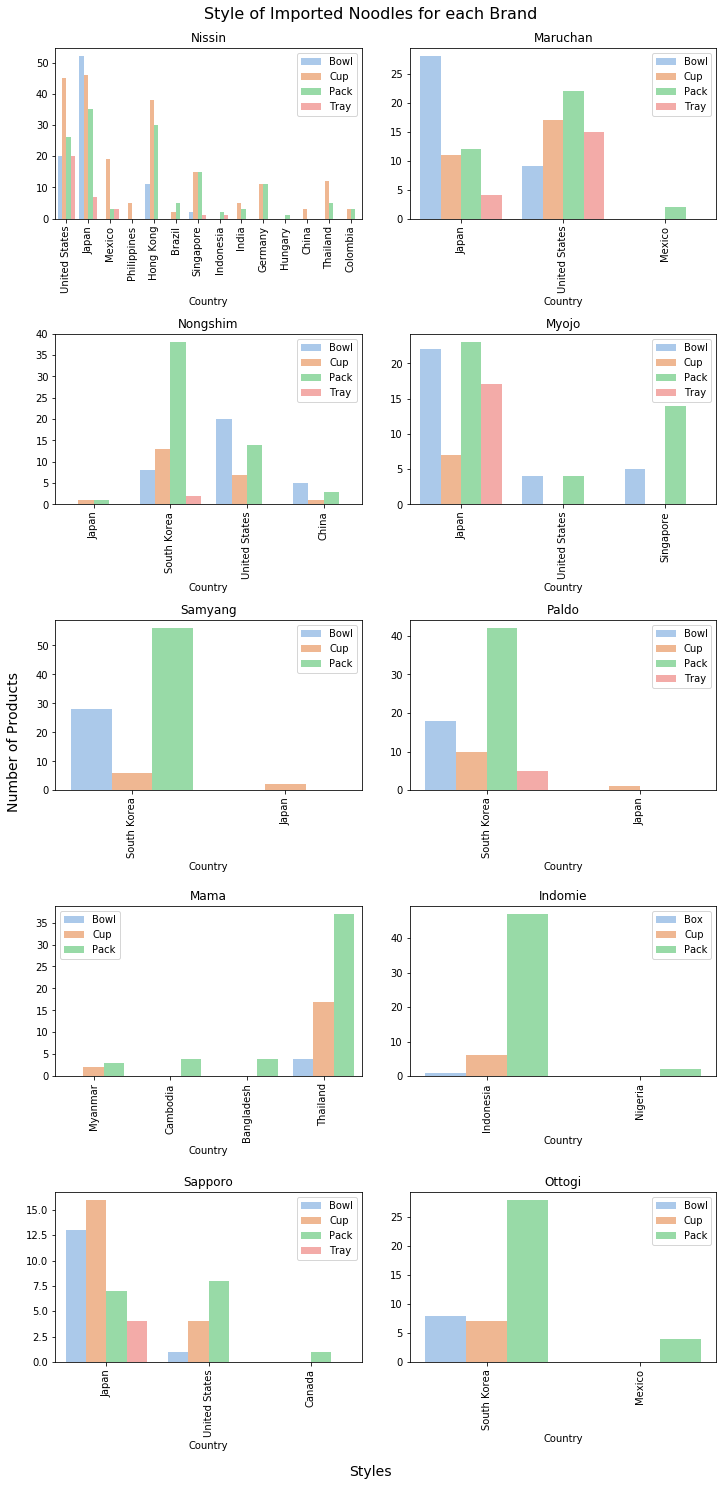

In [33]:
#Display 2 x 5 plots of distribution for each brand noodles
fig,ax = plt.subplots(5, 2, figsize=(10,20))
fig.text(0.5, -0.01, 'Styles', ha = 'center', fontsize = 14)
fig.text(-0.005, .5, 'Number of Products', va = 'center', rotation = 'vertical', fontsize = 14)
plt.suptitle('Style of Imported Noodles for each Brand', y = 1.01, size = 16)



plt.sca(ax[0][0])
seaborn.countplot(x = nissinBrand['Country'], hue = nissinBrand['Style'].sort_values(), data = nissinBrand, palette = 'pastel')
plt.xticks(rotation = 'vertical')
plt.ylabel(' ')
plt.legend(loc = 'upper right')
plt.title('Nissin')


plt.sca(ax[0][1])
seaborn.countplot(x = maruchanBrand['Country'], hue = maruchanBrand['Style'].sort_values(), data = maruchanBrand,palette = 'pastel')
plt.xticks(rotation = 'vertical')
plt.ylabel(' ')
plt.legend(loc = 'upper right')
plt.title('Maruchan')

plt.sca(ax[1][0])
seaborn.countplot(x = nongshimBrand['Country'], hue = nongshimBrand['Style'].sort_values(), data = nongshimBrand, palette = 'pastel')
plt.xticks(rotation = 'vertical')
plt.ylabel(' ')
plt.legend(loc = 'upper right')
plt.title('Nongshim')

plt.sca(ax[1][1])
seaborn.countplot(x = myojoBrand['Country'], hue = myojoBrand['Style'].sort_values(), data = myojoBrand, palette = 'pastel')
plt.xticks(rotation = 'vertical')
plt.ylabel(' ')
plt.legend(loc = 'upper right')
plt.title('Myojo')

plt.sca(ax[2][0])
seaborn.countplot(x = samyangBrand['Country'], hue = samyangBrand['Style'].sort_values(), data = samyangBrand, palette = 'pastel')
plt.xticks(rotation = 'vertical')
plt.ylabel(' ')
plt.legend(loc = 'upper right')
plt.title('Samyang')

plt.sca(ax[2][1])
seaborn.countplot(x = paldoBrand['Country'], hue = paldoBrand['Style'].sort_values(), data = paldoBrand, palette = 'pastel')
plt.xticks(rotation = 'vertical')
plt.ylabel(' ')
plt.legend(loc = 'upper right')
plt.title('Paldo')

plt.sca(ax[3][0])
seaborn.countplot(x = mamaBrand['Country'], hue = mamaBrand['Style'].sort_values(), data = mamaBrand, palette = 'pastel')
plt.xticks(rotation = 'vertical')
plt.ylabel(' ')
plt.legend(loc = 'upper left')
plt.title('Mama')

plt.sca(ax[3][1])
seaborn.countplot(x = indomieBrand['Country'], hue = indomieBrand['Style'].sort_values(), data = indomieBrand, palette = 'pastel')
plt.xticks(rotation = 'vertical')
plt.ylabel(' ')
plt.legend(loc = 'upper right')
plt.title('Indomie')

plt.sca(ax[4][0])
seaborn.countplot(x = sapporoBrand['Country'], hue = sapporoBrand['Style'].sort_values(), data = sapporoBrand, palette = 'pastel')
plt.xticks(rotation = 'vertical')
plt.ylabel(' ')
plt.legend(loc = 'upper right')
plt.title('Sapporo')

plt.sca(ax[4][1])
seaborn.countplot(x = ottogiBrand['Country'], hue = ottogiBrand['Style'].sort_values(), data = ottogiBrand, palette = 'pastel')
plt.xticks(rotation = 'vertical')
plt.ylabel(' ')
plt.legend(loc = 'upper right')
plt.title('Ottogi')


plt.tight_layout()

# Final Observation 

The data set itself is very fulfilling as it serves its purpose of giving the user a simple and clean review of each product, each product’s origin, the brand, and each brand’s rating. However, due to the nature of the dataset being too simple, there is a limit on the number of findings that can be observed from the data. Since the data has one review per product, the ratings for the data may occasionally be skewed or limited. As there are instances where one Brand for example, such as Nissin has received many 5-star ratings. Furthermore, there are also some styles of products which have only been reviewed once, such as bar style noodles, which was then omitted from the set as it had insufficient information. The selected data also had brands that contained less than 10 products, which makes it very difficult to observe since they may skew the data. A solution to minimize this problem was to obtain data that contained more than 30 products, and consequently perform observations using the top 10 data. Overall, the data is fun and entertaining since it gives users a quick summary of which noodles one can recommend to other noodle enthusiasts!